In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("api_ny.gdp.mktp.cd_ds2_en_csv_v2_422026.csv", skiprows=3)
df = df.drop(["Country Code", "Indicator Name", "Indicator Code"], axis = 1)
df = df.set_index("Country Name")

df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN,NaN
Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.505888e+10,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09,NaN,NaN


In [3]:
df["2018"].dropna().sort_values(ascending=False)[:30]

Country Name
World                                                   8.580439e+13
High income                                             5.411879e+13
OECD members                                            5.261014e+13
Post-demographic dividend                               5.002770e+13
IDA & IBRD total                                        3.267245e+13
Low & middle income                                     3.171682e+13
Middle income                                           3.114302e+13
IBRD only                                               3.046677e+13
East Asia & Pacific                                     2.591829e+13
Upper middle income                                     2.443513e+13
Europe & Central Asia                                   2.304149e+13
North America                                           2.221325e+13
Late-demographic dividend                               2.217029e+13
United States                                           2.049410e+13
European Union       

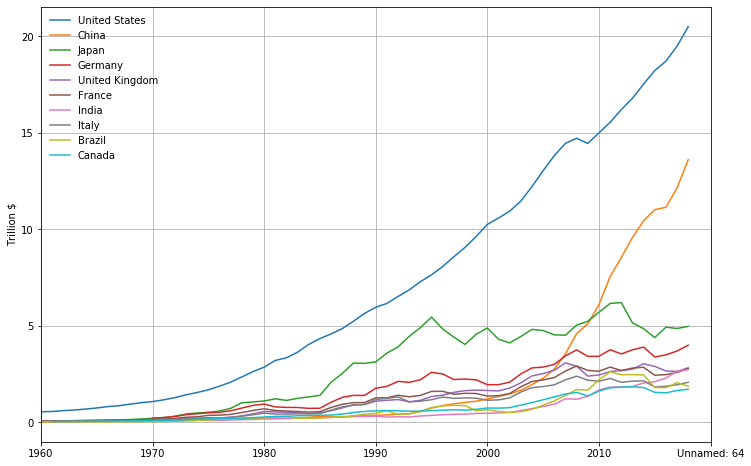

In [4]:
top10 = ["United States", "China", "Japan", "Germany", "United Kingdom", 
        "France", "India", "Italy", "Brazil", "Canada"]

plt.figure(figsize=(12,8))
for country in top10:
    (df.loc[country]/1e12).plot()
plt.ylabel("Trillion $")
plt.grid()
plt.legend(frameon=False)

In [5]:
for year in range(1980, 2018):
    dfYear = df[[str(year)]].copy()
    dfTop = dfYear.loc[top10]
    top10Sum = dfTop.sum().values[0]
    rest = dfYear.loc["World"].values[0] - top10Sum
    gdp = [rest] + list(dfTop.values.T[0])
    labels = ["Others"] + list(dfTop.index.values)

    plt.figure(figsize=(15, 15))
    _ = plt.pie(x = gdp, labels = labels, autopct='%1.1f%%', labeldistance = 1.1)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.savefig("./pie/%i.png"%(year))
    plt.close()